## LDA over 20NG

What actually is LDA ? 

  - Document = Distribution over Topics

  - Topics = Distribution over Words

To find hidden topics using UML techniques, we use LDA and then match with respective class labels

In [19]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [20]:
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
documents = newsgroups.data
labels = newsgroups.target
label_names = newsgroups.target_names


print("\nClasses in 20 Newsgroups:")
for i, name in enumerate(label_names):
    print(f"{i}: {name}")


Classes in 20 Newsgroups:
0: alt.atheism
1: comp.graphics
2: comp.os.ms-windows.misc
3: comp.sys.ibm.pc.hardware
4: comp.sys.mac.hardware
5: comp.windows.x
6: misc.forsale
7: rec.autos
8: rec.motorcycles
9: rec.sport.baseball
10: rec.sport.hockey
11: sci.crypt
12: sci.electronics
13: sci.med
14: sci.space
15: soc.religion.christian
16: talk.politics.guns
17: talk.politics.mideast
18: talk.politics.misc
19: talk.religion.misc


In [21]:
count_vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
count_data = count_vectorizer.fit_transform(documents)
feature_names = count_vectorizer.get_feature_names_out()

In [23]:
sample_index = 123
sample_doc = documents[sample_index]
actual_class = label_names[labels[sample_index]]

print(f"\nSample Document Index: {sample_index}")
print(f"Actual Class: {actual_class}")
print(f"Sample Text:\n{sample_doc[:1000]}...")


Sample Document Index: 123
Actual Class: sci.electronics
Sample Text:

 >
 >: Thus, a deciBell (deci-, l., tenth of + Bell) is a fractional part of the
 >: original Bell.  For example, SouthWestern Bell is a deciBell.
 >
 >Out of what hat did you pull this one?  dB is a ratio not an RBOC!
 >
 >: And the measure of current, Amp, is actually named after both the AMP company
 >: and the Amphenol company.  Both companies revolutionized electronics by
 >: simulatenously realizing that the performance of connectors and sockets
 >: were affected by the amount of current running through the wires.
 >
 >Sorry.  The unit for current is the AMPERE which is the name of a french-man
 >named AMPERE who studied electrical current.  The term AMP is just an abbreviation
 >of it.  The company AMP came after the AMPERE unit was already in use.
 >
 >: The Ohmite company was the first to characterize resistances by numbers,
 >: thus our use of the Ohms...
 >
 >I don't know about this one, but it doesn't s


Training LDA for K=10 topics...

Top 20 Words Per Topic for K=10

Topic 1:
  space (1277.9111), 00 (825.7157), armenian (742.2094), turkish (648.3663), new (592.5095), earth (524.187), armenians (442.3179), nasa (383.1212), 50 (376.2068), 10 (370.8493), turkey (368.2064), university (341.5591), years (318.564), orbit (310.3788), greek (309.2268), book (304.0091), moon (298.4562), shuttle (293.9604), genocide (291.5348), 000 (290.7113)

Topic 2:
  use (2242.6166), windows (2222.9588), file (1777.8995), dos (1593.3249), drive (1530.0166), image (1374.0504), using (1337.8504), does (1321.6571), like (1302.4407), software (1252.322), program (1226.0932), version (1180.2982), problem (1155.9906), know (1117.6985), bit (1113.855), card (1111.4278), files (1108.5348), disk (1054.4029), available (1050.295), window (1022.6514)

Topic 3:
  file (673.9708), use (567.1144), health (505.4817), medical (480.7199), number (420.0839), program (413.4472), entry (385.3573), disease (378.6194), researc

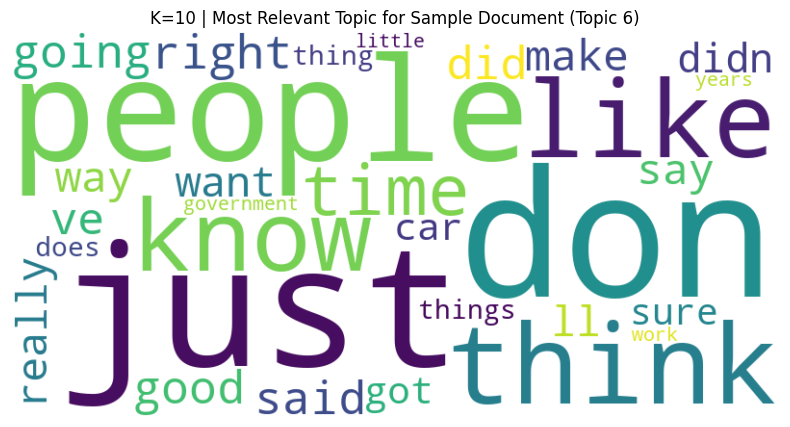


Training LDA for K=20 topics...

Top 20 Words Per Topic for K=20

Topic 1:
  armenian (705.2997), turkish (477.0646), armenians (395.5358), genocide (310.0806), gm (272.6508), university (256.4894), history (241.5115), turkey (227.3935), soviet (223.1707), turks (217.6117), armenia (205.4481), population (203.3433), new (202.4762), istanbul (195.5497), russian (188.2602), theory (183.6761), muslim (171.7997), people (168.2297), ottoman (168.0183), million (155.5629)

Topic 2:
  file (1818.8361), windows (1564.0007), image (1411.2186), use (1346.1457), files (1124.6929), program (1067.5343), available (1054.3278), dos (1041.9019), version (1014.7914), window (1013.2346), edu (1005.0685), ftp (1003.7839), using (848.5039), jpeg (806.05), server (805.4618), software (804.8349), graphics (793.0913), display (771.835), data (765.3246), color (742.96)

Topic 3:
  file (665.4297), health (469.4872), medical (462.4048), use (391.1875), entry (374.9973), disease (374.1616), number (353.0406), 

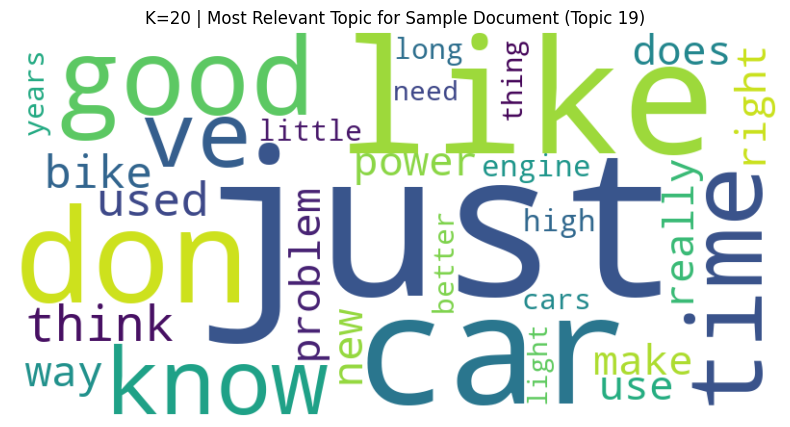


Training LDA for K=50 topics...

Top 20 Words Per Topic for K=50

Topic 1:
  gm (292.4294), soviet (97.4309), john (71.991), st (67.528), moncton (67.3883), rochester (65.3657), baltimore (63.6808), providence (61.3049), springfield (57.3734), utica (57.02), cape (54.6257), european (54.3153), binghamton (53.02), adirondack (51.02), year (50.9996), vs (50.2576), people (49.7128), breton (46.02), turkish (45.3096), fredericton (44.02)

Topic 2:
  file (1054.334), image (781.4793), use (725.4669), files (580.0363), program (576.9437), display (550.9793), available (481.969), using (466.6136), version (457.7006), sun (412.8317), set (403.174), data (400.8), code (387.5187), user (382.7621), motif (373.9366), server (367.3317), ftp (347.0612), software (310.9341), directory (297.1449), unix (261.3175)

Topic 3:
  medical (452.8418), health (452.4178), disease (330.1504), cancer (311.7074), study (306.292), patients (304.2523), gun (278.2571), 1993 (264.9222), drug (259.7589), number (256.

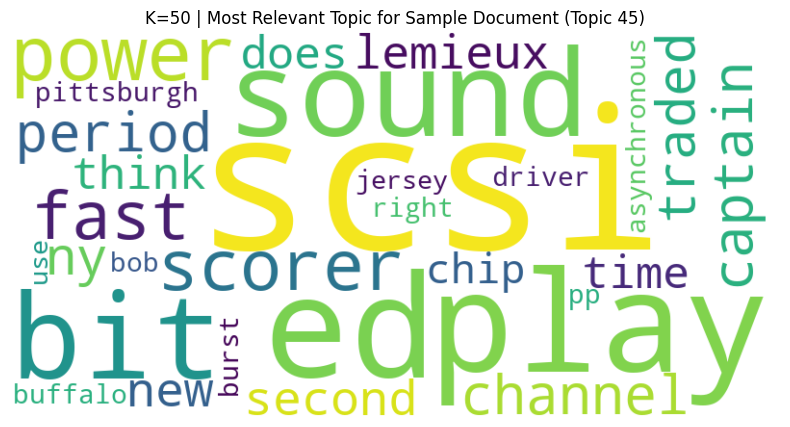

In [24]:
topic_counts = [10, 20, 50]

for K in topic_counts:
    print(f"\n{'='*30}\nTraining LDA for K={K} topics...\n{'='*30}")
    lda = LatentDirichletAllocation(n_components=K, random_state=42)
    lda.fit(count_data)

    print(f"\nTop 20 Words Per Topic for K={K}")
    for topic_idx, topic in enumerate(lda.components_):
        top_words = [f"{feature_names[i]} ({round(topic[i], 4)})" 
                     for i in topic.argsort()[:-21:-1]]
        print(f"\nTopic {topic_idx + 1}:")
        print("  " + ", ".join(top_words))

    sample_vec = count_vectorizer.transform([sample_doc])
    topic_distribution = lda.transform(sample_vec)[0]

    print(f"\nTopic Distribution for Sample Document (K={K}):")
    for i, prob in enumerate(topic_distribution):
        print(f"Topic {i + 1}: {prob:.4f}")

    top_topic = topic_distribution.argmax()
    top_topic_words = {
        feature_names[i]: lda.components_[top_topic][i]
        for i in lda.components_[top_topic].argsort()[:-31:-1]
    }

    wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_topic_words)
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"K={K} | Most Relevant Topic for Sample Document (Topic {top_topic+1})")
    plt.show()


## NMF over 20NG

In [26]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
import numpy as np

In [27]:
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
documents = newsgroups.data

tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf_data = tfidf_vectorizer.fit_transform(documents)
feature_names = tfidf_vectorizer.get_feature_names_out()

for K in [10, 20, 50]:
    print(f"\n{'='*30}\nNMF with K={K} Topics\n{'='*30}")
    
    nmf_model = NMF(n_components=K, random_state=42)
    nmf_model.fit(tfidf_data)

    for topic_idx, topic in enumerate(nmf_model.components_):
        top_words = [(feature_names[i], round(topic[i], 4)) 
                     for i in topic.argsort()[:-21:-1]]
        print(f"\nTopic {topic_idx + 1}:")
        print("  " + ", ".join([f"{word} ({weight})" for word, weight in top_words]))



NMF with K=10 Topics

Topic 1:
  don (1.2287), just (1.1829), like (0.9474), think (0.9311), know (0.6342), good (0.6255), ve (0.6111), time (0.5124), really (0.4862), want (0.461), people (0.431), say (0.4246), ll (0.3957), way (0.3941), right (0.3802), make (0.3797), thing (0.3745), going (0.3728), sure (0.3696), things (0.3522)

Topic 2:
  windows (1.6244), dos (0.8092), file (0.7771), program (0.5055), files (0.4992), window (0.4732), use (0.3835), using (0.347), run (0.336), running (0.3359), os (0.3267), version (0.326), ms (0.3257), problem (0.3152), screen (0.2628), pc (0.2584), server (0.2573), mouse (0.2548), application (0.234), software (0.2323)

Topic 3:
  god (2.0594), jesus (0.7606), bible (0.4527), believe (0.4068), christ (0.4044), faith (0.3678), christian (0.3603), christians (0.3375), sin (0.308), church (0.2625), does (0.2499), life (0.2433), say (0.2345), belief (0.215), lord (0.2136), heaven (0.2099), love (0.2085), man (0.2063), christianity (0.1931), hell (0.1

/Users/jenishkothari/Northeastern/DS5230_backup/myenv/lib/python3.13/site-packages/sklearn/decomposition/_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
